In [44]:
imgname = "example.png"
#'print at 254 dpi

---
Below here be dragons, only touch the cells if you know what you are doing
---

In [175]:
from PIL import Image, ImageFilter, ImageDraw, ImageDraw2, ImageFont, ImageOps
from io import BytesIO
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import tempfile

#for widgets
%matplotlib nbagg

#some setup
def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
# display pil image (dpi)
dpi = png_formatter.for_type(Image.Image, display_pil_image)


In [53]:

colorOptions=[]
o = widgets.IntSlider(min=1, max=32, value=8, description="Pixels")
u = widgets.IntSlider(min=1, max=32, value=8, description="Colors")
param_quantMode = widgets.Dropdown(description="Quantize Mode", options=[Image.FASTOCTREE, Image.MAXCOVERAGE, Image.MEDIANCUT, Image.LIBIMAGEQUANT ])
param_resizeMode = widgets.Dropdown(description="Resize Mode", options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS ])
param_fixedPalette = widgets.Checkbox(description='Fixed palette')
param_useColorAsAlpha = widgets.Dropdown(description="Alpha Color",options=colorOptions)
param_showOutputColors = widgets.Checkbox(description='Show output')
piximg = ""

def pixelate(input_file_path, pixel_size):
    image = Image.open(input_file_path)
    image = image.resize(
        (image.size[0] // pixel_size, image.size[1] // pixel_size),
        param_resizeMode.value
    ) 
    #image = image.resize(
    #    (image.size[0] * pixel_size, image.size[1] * pixel_size),
    #    param_resizeMode.value
    #)
    return image
 

def convertImage(c,d,e,f,g,h,i):
    piximg = pixelate(imgname,o.value)

    if param_fixedPalette.value:
        #palettedata =  [255,255,255,255,255,0]
        palettedata =  [255,255,255,93,143,241,233,136,56,239,148,84 ]
        while len(palettedata) < 768:
            palettedata.append(0)
            palettedata.append(0)
            palettedata.append(0)
        palimage = Image.new('P', (12, 12))
        palimage.putpalette(palettedata)
        piximg = piximg.quantize(method=param_quantMode.value, colors=u.value, dither=Image.NONE, palette=palimage)
    else:
        piximg = piximg.quantize(method=param_quantMode.value,dither=0,colors=u.value,kmeans=1)

    piximg = piximg.convert("RGBA")
    na = np.array(piximg) 
    colours, counts = np.unique(na.reshape(-1,4), axis=0, return_counts=1)    
    mdtxt = "<pre>"
    colorOptions.clear()
    colorOptions.append("None")
    for a in colours:
        colour = "%0.2X%0.2X%0.2X" % (a[0], a[1], a[2])
        colStr = "#{:02x}{:02x}{:02x}|{:02x}".format(a[0],a[1],a[2],a[3])
        mdtxt = mdtxt + colStr +" ("+"<span style='color: #"+colour+"'>this</span>)<BR>";
        colorOptions.append(colStr)
    param_useColorAsAlpha.options = colorOptions
    mdtxt = mdtxt + "</pre>"
    if h:
        display.display(piximg)
        display.display(Markdown(mdtxt))

        
    return piximg
    #print(colours)
    
widgets.interact(convertImage, c=o, d=u, e=param_fixedPalette, f=param_quantMode, g=param_resizeMode, h=param_showOutputColors, i=param_useColorAsAlpha)


interactive(children=(IntSlider(value=8, description='Pixels', max=32, min=1), IntSlider(value=8, description=…

<function __main__.convertImage(c, d, e, f, g, h, i)>

In [54]:
piximg = convertImage(c=o, d=u, e=param_fixedPalette, f=param_quantMode, g=param_resizeMode, h=False, i=param_useColorAsAlpha)
pixarr = np.array(piximg)
pixpal = {}
pixidx = 0
pixlit = "abcdefghijklmnopqrstuvwxyz1234567890!§$%&/()#+\\\"-.:"

mdtxt = "<pre>"
print("Alpha: ",param_useColorAsAlpha.value)
for x in pixarr:
    for a in x:
        colStr = "#{:02x}{:02x}{:02x}|{:02x}".format(a[0],a[1],a[2],a[3])
        colour = "%0.2X%0.2X%0.2X" % (a[0], a[1], a[2])
        out = "?"
        if colStr in pixpal:
            out = pixpal[colStr]
        else:
            pixpal[colStr] = str(pixidx)
            pixidx = pixidx+1
            out = pixpal[colStr]
        out = pixlit[int(out)]
        #print(colStr)
        if ( a[3] == 0 ) or ( colStr == param_useColorAsAlpha.value ):
            out = " "
        mdtxt = mdtxt + "<span style='color: #"+colour+"'>"+out+"</span>"
    mdtxt = mdtxt+"<BR>"

mdtxt = mdtxt + "</pre>"
display.display(Markdown(mdtxt))
    
    

Alpha:  None


<pre><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><BR><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><BR><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><BR><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><BR><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><BR><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><BR><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><BR><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><BR><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><BR><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><span style='color: #000000'>b</span><span style='color: #BCBCBC'>a</span><BR></pre>

In [176]:
piximg = convertImage(c=o, d=u, e=param_fixedPalette, f=param_quantMode, g=param_resizeMode, h=False, i=param_useColorAsAlpha)
pixarr = np.array(piximg)
pixpal = {}
pixidx = 0
pixlit = "abcdefghijklmnopqrstuvwxyz1234567890!§$%&/()#+\\\"-.:"
diamondSize = 28
fontSize = 12

fnt = ImageFont.truetype("NotoSans-Black.ttf", fontSize)
newpix = Image.new('RGB',(piximg.size[0]*diamondSize,piximg.size[1]*diamondSize))

newpixdc = ImageDraw.Draw(newpix)
newpixdc.rectangle((0,0,piximg.size[0]*diamondSize,piximg.size[1]*diamondSize), fill=(255,255,255))

xcnt = 0
ycnt = 0
for x in pixarr:
    xcnt = 0
    for a in x:
        colStr = "#{:02x}{:02x}{:02x}|{:02x}".format(a[0],a[1],a[2],a[3])        
        colour = "%0.2X%0.2X%0.2X" % (a[0], a[1], a[2])
        out = "?"
        if colour in pixpal:
            out = pixpal[colour]
        else:
            pixpal[colour] = str(pixidx)
            pixidx = pixidx+1
            out = pixpal[colour]
        out = pixlit[int(out)]

        if ( a[3] != 0 ) and ( colStr != param_useColorAsAlpha.value ):
            invcolor = (255-a[0],255-a[1],255-a[2])
            newpixdc.ellipse(((xcnt*diamondSize,ycnt*diamondSize),(xcnt*diamondSize+(diamondSize),ycnt*diamondSize+diamondSize)),(a[0],a[1],a[2]),(0,0,0))
            newpixdc.text((xcnt*diamondSize+(diamondSize/2),ycnt*diamondSize+(diamondSize/2)),out,invcolor,font=fnt,anchor="mm")


        xcnt = xcnt + 1
    ycnt = ycnt + 1

def set_image_dpi_resize(image):
    """
    Rescaling image to 300dpi while resizing
    :param image: An image
    :return: A rescaled image
    """
    length_x, width_y = image.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    image_resize = image.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='1.png')
    temp_filename = temp_file.name
    image_resize.save(temp_filename, dpi=(300, 300))
    return temp_filename

display.display(set_image_dpi_resize(newpix))

'/tmp/tmp_3lgaibo1.png'

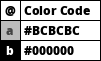

In [173]:
def autocrop(image):
    image_data = np.asarray(image)
    image_data_bw = image_data.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<255)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<255)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]

    new_image = Image.fromarray(image_data_new)
    return new_image

fnt = ImageFont.truetype("NotoSans-Black.ttf", fontSize)
newpix = Image.new('RGB',(piximg.size[0]*diamondSize,piximg.size[1]*diamondSize))

newpixdc = ImageDraw.Draw(newpix)
newpixdc.rectangle((0,0,piximg.size[0]*diamondSize,piximg.size[1]*diamondSize), fill=(255,255,255))


xWidth = 100
xLeft = 20
yPos = 0
yHeight = 20

newpixdc.rectangle((0,yPos,xWidth,yPos+yHeight),fill=None,outline=(0,0,0))
newpixdc.rectangle((0,yPos,xLeft,yPos+yHeight),fill=None,outline=(0,0,0))
newpixdc.text((10,10),"@",(0,0,0),font=fnt,anchor="mm")
newpixdc.text((xLeft+4,10),"Color Code",(0,0,0),font=fnt,anchor="lm")

yPos = yPos + yHeight
for colour in pixpal:
    a=(int(colour[0:2],16),int(colour[2:4],16),int(colour[4:6],16))
    invcolor = (255-a[0],255-a[1],255-a[2])
    newpixdc.rectangle((0,yPos,xWidth,yPos+yHeight),fill=None,outline=(0,0,0))
    newpixdc.rectangle((0,yPos,xLeft,yPos+yHeight),fill="#"+colour,outline=(0,0,0))
    newpixdc.text((10,yPos+yHeight/2),pixlit[int(pixpal[colour])],invcolor,font=fnt,anchor="mm")
    newpixdc.text((xLeft+4,yPos+yHeight/2),"#"+colour,(0,0,0),font=fnt,anchor="lm")
    yPos = yPos + yHeight
newpix = autocrop(newpix)
#newpixdc.rectangle((0,0,100,20),fill=None,outline=(0,0,0))
#newpixdc.text((80,10),"a",invcolor,font=fnt,anchor="mm")

display.display(newpix)

---
Below this point are only tests I ran

In [ ]:
print(piximg.size)
#newpix = Image.new('RGB',(piximg.size[0]*40,piximg.size[1]*40))
newpix = Image.new('RGB',(80,80))
fnt = ImageFont.truetype("NotoSans-Black.ttf", 25)

x = ImageDraw.Draw(newpix)
x.ellipse(((0,0),(40,40)),(128,128,128),(128,128,128))
x.text((20,20),"P",(255,255,0),font=fnt,anchor="mm")

display.display(newpix)

In [168]:
a="BCBCBC"
print((int(a[0:2],16),int(a[2:4],16),int(a[4:6],16)))

(188, 188, 188)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]


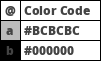

In [153]:
image_data = np.asarray(newpix)
image_data_bw = image_data.max(axis=2)
#print(image_data_bw.min(axis=1))
print(np.where(image_data_bw.min(axis=0)<255)[0])
print(np.where(image_data_bw.min(axis=1)<255)[0])
cropBox = (0,60,0,100)
image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
display.display(Image.fromarray(image_data_new))